In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAN608/Data/test_scores.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


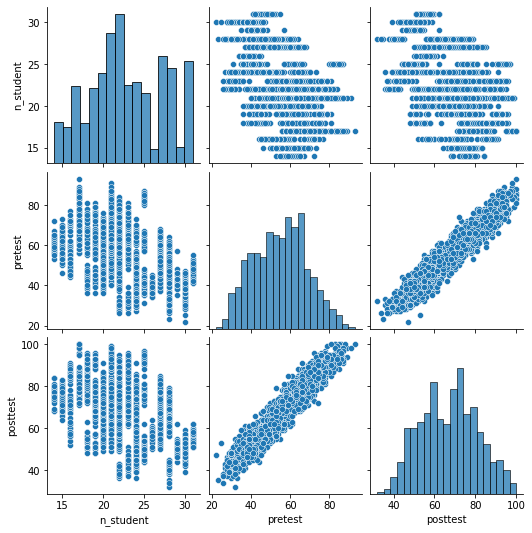

In [ ]:
sns.pairplot(df)

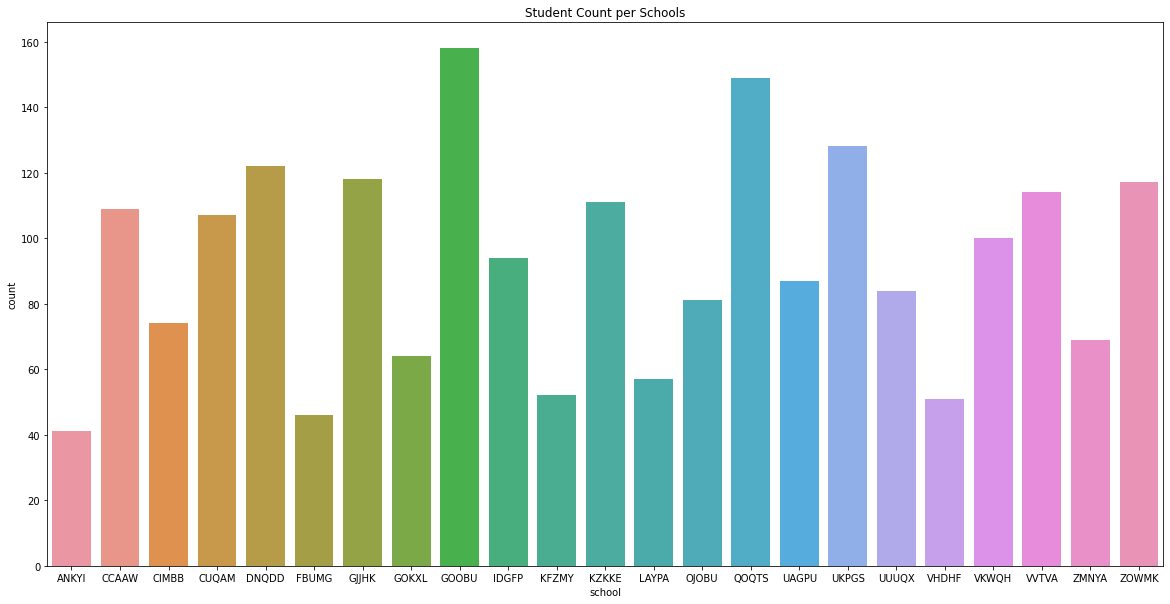

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Student Count per Schools')
sns.countplot(data=df, x='school');

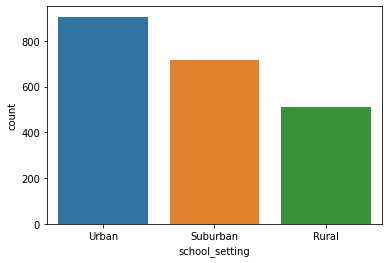

In [ ]:
sns.countplot(x='school_setting',data=df)

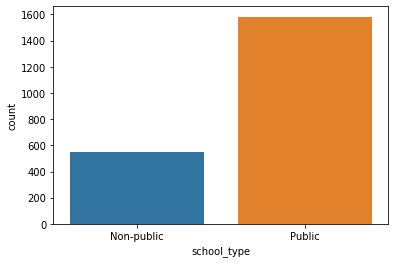

In [ ]:
sns.countplot(x='school_type',data=df)

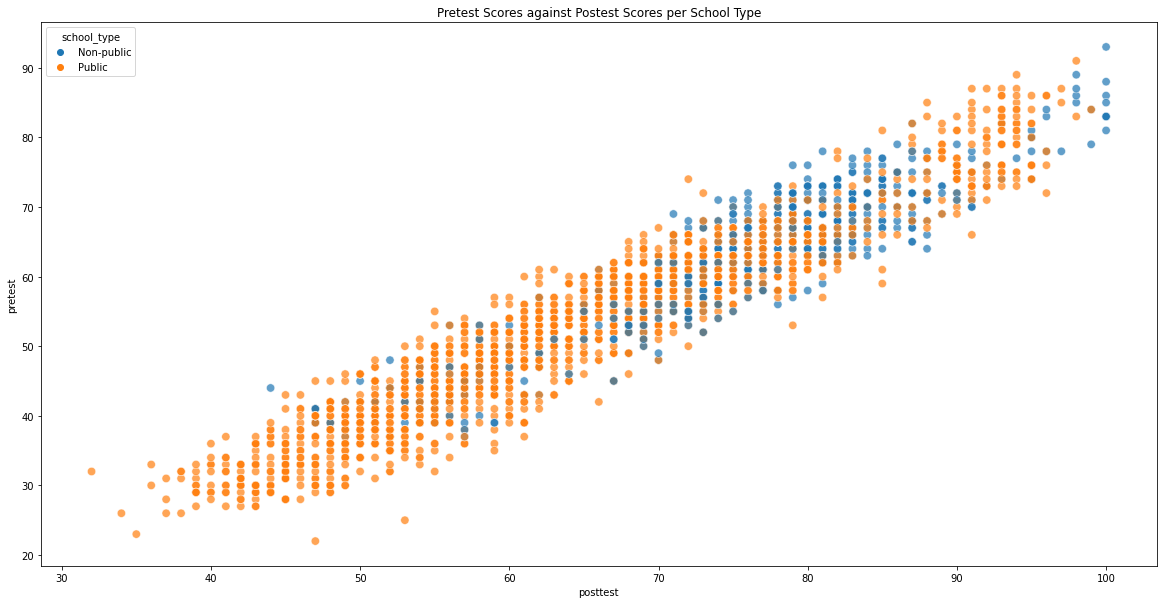

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Pretest Scores against Postest Scores per School Type')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='school_type', s=70, alpha=0.7);

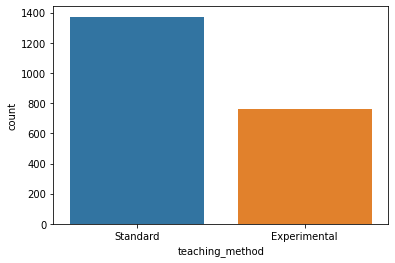

In [ ]:
sns.countplot(x='teaching_method',data=df)

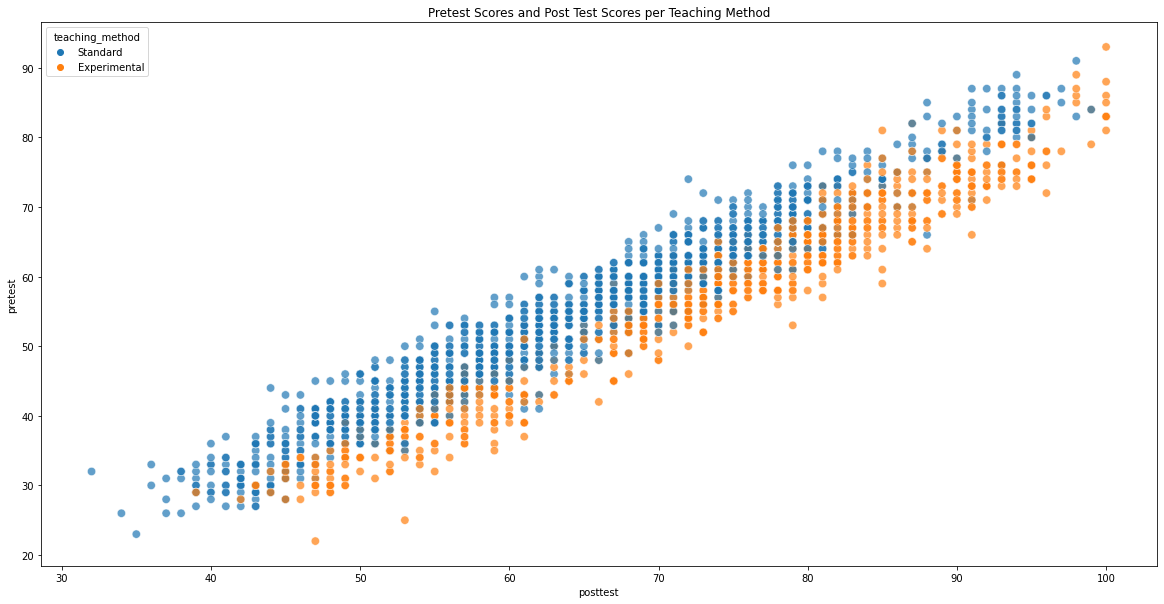

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Pretest Scores and Post Test Scores per Teaching Method')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='teaching_method', s=70, alpha=0.7);

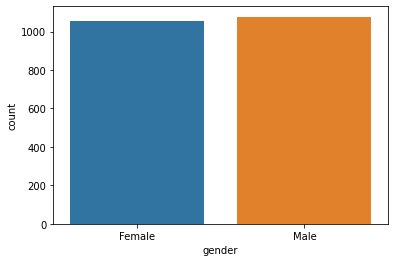

In [ ]:
sns.countplot(x='gender',data=df)

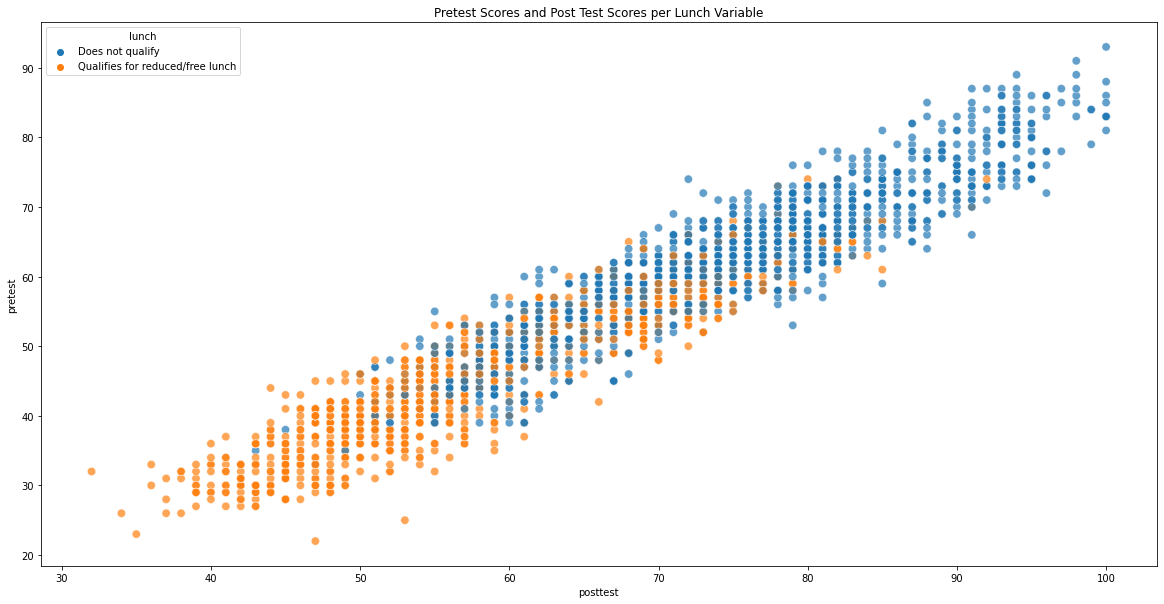

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Pretest Scores and Post Test Scores per Lunch Variable')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='lunch', s=70, alpha=0.7);

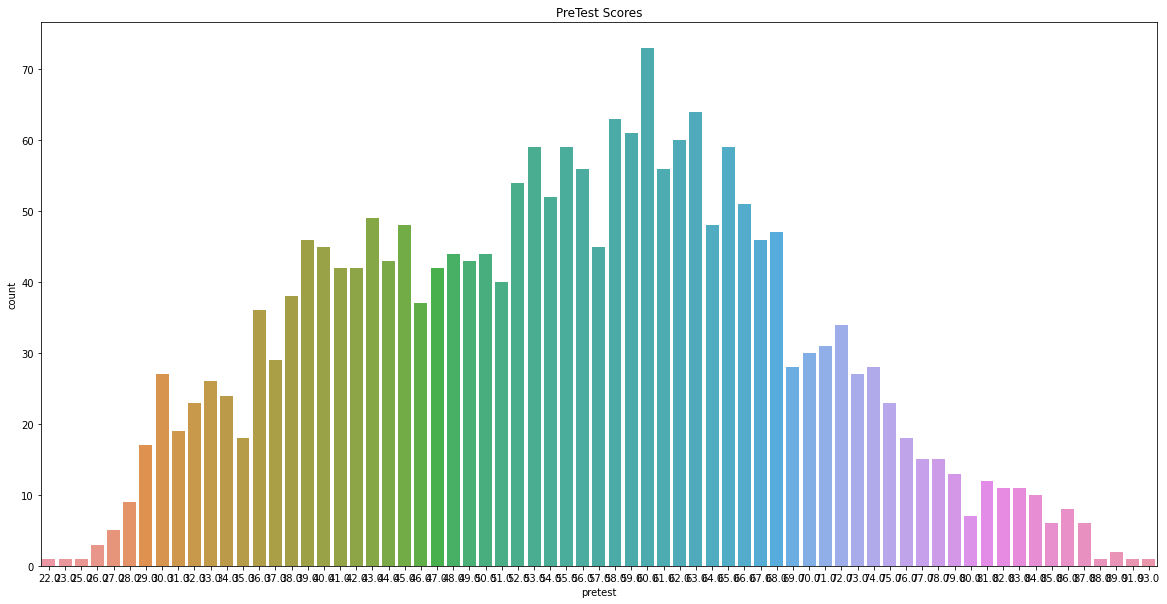

In [ ]:
plt.figure(figsize=(20,10))
plt.title('PreTest Scores')
sns.countplot(x='pretest',data=df)

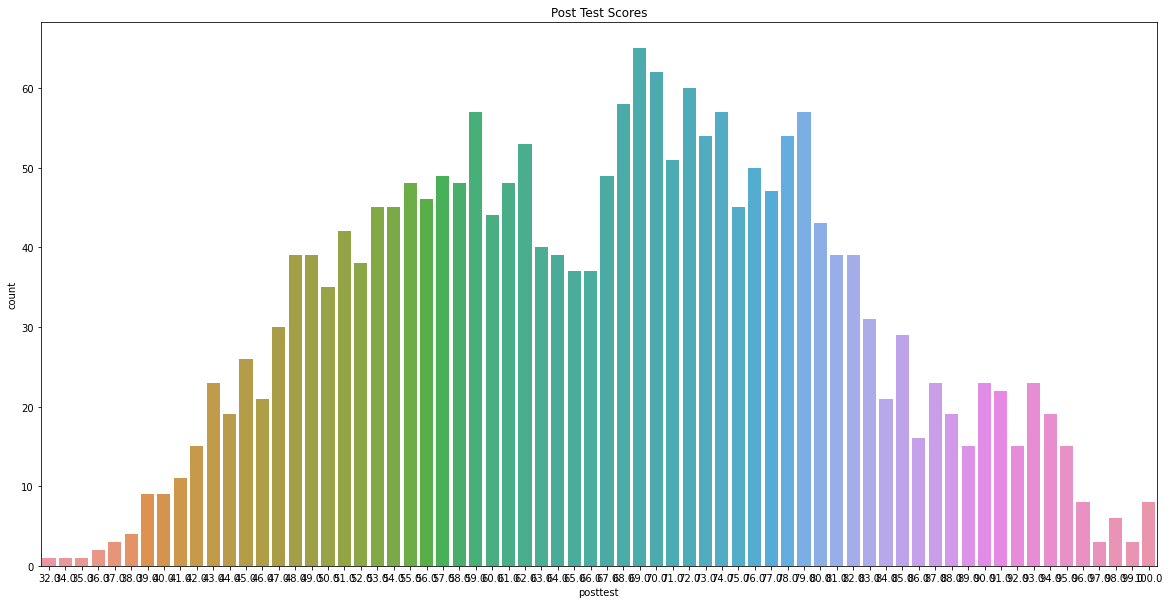

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Post Test Scores')
sns.countplot(x='posttest',data=df)

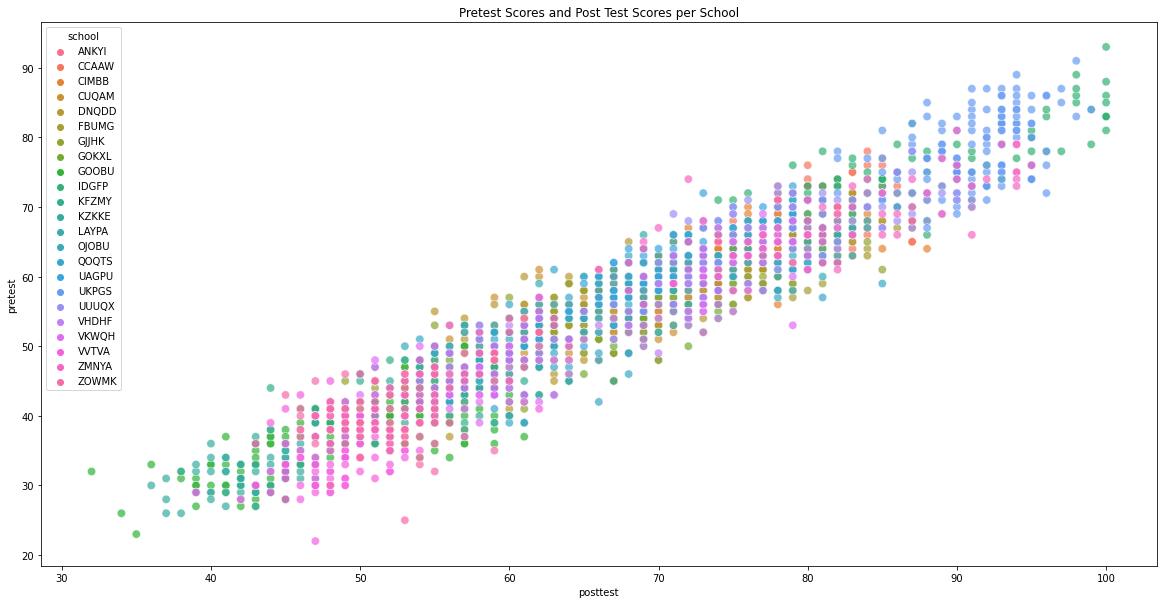

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Pretest Scores and Post Test Scores per School')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='school', s=70, alpha=0.7);

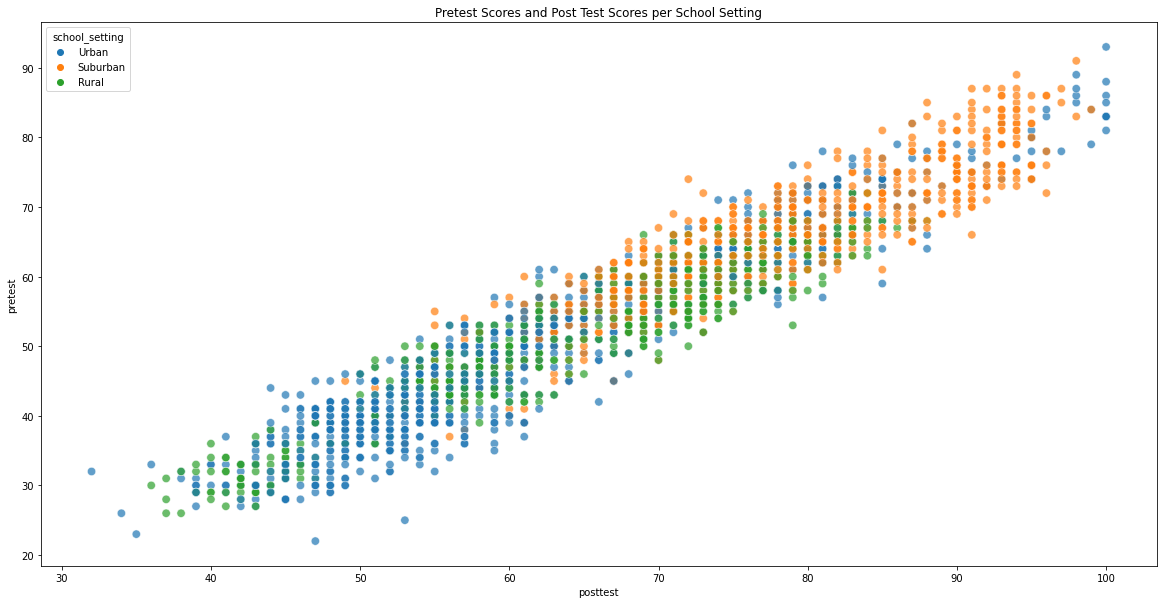

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Pretest Scores and Post Test Scores per School Setting')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='school_setting', s=70, alpha=0.7);

**Feature Engineering**

Creating a binary target

In [ ]:
df.loc[df['posttest'] >= 75, 'target_75_score'] = 1
df.loc[df['posttest'] < 75, 'target_75_score'] = 0

df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,target_75_score
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,0.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,1.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,1.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,1.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,1.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0,0.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0,1.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0,0.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0,1.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0,0.0


In [ ]:
df = df.drop('student_id', axis=1)

In [ ]:
df = df.drop('posttest', axis =1)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,n_student,pretest,target_75_score,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,school_KFZMY,school_KZKKE,school_LAYPA,school_OJOBU,school_QOQTS,school_UAGPU,school_UKPGS,school_UUUQX,school_VHDHF,school_VKWQH,school_VVTVA,school_ZMNYA,school_ZOWMK,school_setting_Suburban,school_setting_Urban,school_type_Public,classroom_08N,classroom_0N7,classroom_18K,classroom_197,classroom_1Q1,classroom_1SZ,classroom_1UU,classroom_1VD,classroom_21Q,classroom_2AP,classroom_2B1,classroom_2BR,...,classroom_P8I,classroom_PBA,classroom_PC6,classroom_PGH,classroom_PGK,classroom_PW5,classroom_Q0E,classroom_QA2,classroom_QTU,classroom_RA5,classroom_RK7,classroom_ROP,classroom_S98,classroom_SSP,classroom_ST7,classroom_SUR,classroom_TB5,classroom_TSA,classroom_U6J,classroom_UHU,classroom_UWK,classroom_V77,classroom_VA6,classroom_W8A,classroom_X2O,classroom_X6Z,classroom_X78,classroom_XJ8,classroom_XXE,classroom_XXJ,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20.0,66.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,20.0,64.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,20.0,61.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20.0,64.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X = df.drop('target_75_score', axis =1)
y = df ['target_75_score']

# **Building Models**

Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree_preds = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,dtree_preds)

array([[417,  24],
       [ 18, 181]])

In [ ]:
print(classification_report(y_test,dtree_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       441
         1.0       0.88      0.91      0.90       199

    accuracy                           0.93       640
   macro avg       0.92      0.93      0.92       640
weighted avg       0.94      0.93      0.93       640



Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=20)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test,rfc_preds)

array([[420,  21],
       [ 20, 179]])

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       441
         1.0       0.90      0.90      0.90       199

    accuracy                           0.94       640
   macro avg       0.92      0.93      0.93       640
weighted avg       0.94      0.94      0.94       640



Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_

array([-1.19366030e+11,  1.70349121e-01, -1.88551954e+12, -2.18666409e+11,
       -4.07187745e+11,  3.57759464e+11, -3.18035106e+12, -3.28548844e+11,
       -9.12042644e+11,  9.50929951e+11,  3.49574013e+11,  5.05876827e+11,
       -1.68108124e+12,  9.79246989e+10, -6.15821084e+11,  1.83332655e+12,
        1.74249155e+12, -4.19871144e+11, -2.26523050e+12, -2.35960157e+12,
        2.49441914e+12,  2.04029009e+12,  2.76945799e+12,  3.67125531e+12,
       -6.35887150e+11, -3.43512939e+12, -1.86159386e+12,  2.02387087e+11,
        1.08916957e+11,  3.30066708e+11,  1.47695764e+12,  9.01747676e+11,
       -7.55547569e+11, -1.46882929e+12,  5.03395976e+10, -1.48720786e+11,
       -1.20510245e+11,  5.62268015e+11,  5.65409614e+11, -1.08329835e+12,
        6.97277499e+11, -9.24582489e+10, -1.64714645e+12,  7.03476629e+11,
        1.62697838e+12,  3.26344368e+11, -9.87116879e+11,  4.93351008e+11,
        1.76783352e+11,  2.27627463e+11, -3.64116397e+11,  1.59116112e+11,
        2.41573111e+11,  

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('Mean absolute error is', mae)
print('Mean Squared Error is', mse)
print('Root Mean Square Error is', rmse)

Mean absolute error is 0.10972932574179621
Mean Squared Error is 0.040802366927533695
Root Mean Square Error is 0.20199595770097403


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


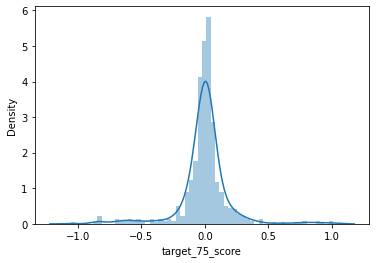

In [ ]:
residuals = y_test - predictions 
sns.distplot(residuals,bins=60)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       441
         1.0       0.93      0.94      0.94       199

    accuracy                           0.96       640
   macro avg       0.95      0.96      0.95       640
weighted avg       0.96      0.96      0.96       640



Support Vector Machines 

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       441
         1.0       0.91      0.93      0.92       199

    accuracy                           0.95       640
   macro avg       0.94      0.95      0.94       640
weighted avg       0.95      0.95      0.95       640



Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
# Layer 1
model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.2))
# Layer 2
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2))
# Layer 3
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2))
# Layer 4
model.add(Dense(units=15,activation='relu'))

# Layer 5
model.add(Dense(units=10,activation='relu'))

# Layer 6
model.add(Dense(units=8,activation='relu'))

# Layer 7
model.add(Dense(units=6,activation='relu'))

# Layer 8
model.add(Dense(units=1))

# For a binary classification problem
model.compile(loss='mse', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
47/47 [==============================] - 1s 5ms/step - loss: 0.2035 - val_loss: 0.1469
Epoch 2/150
47/47 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.0980
Epoch 3/150
47/47 [==============================] - 0s 2ms/step - loss: 0.1191 - val_loss: 0.0819
Epoch 4/150
47/47 [==============================] - 0s 2ms/step - loss: 0.1053 - val_loss: 0.0703
Epoch 5/150
47/47 [==============================] - 0s 3ms/step - loss: 0.0912 - val_loss: 0.0781
Epoch 6/150
47/47 [==============================] - 0s 3ms/step - loss: 0.0842 - val_loss: 0.0611
Epoch 7/150
47/47 [==============================] - 0s 2ms/step - loss: 0.0784 - val_loss: 0.0662
Epoch 8/150
47/47 [==============================] - 0s 2ms/step - loss: 0.0731 - val_loss: 0.0527
Epoch 9/150
47/47 [==============================] - 0s 2ms/step - loss: 0.0676 - val_loss: 0.0653
Epoch 10/150
47/47 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0585
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
print(model_loss)

        loss  val_loss
0   0.203483  0.146935
1   0.151804  0.097979
2   0.119064  0.081889
3   0.105323  0.070313
4   0.091182  0.078115
..       ...       ...
65  0.042846  0.043563
66  0.039623  0.043814
67  0.040925  0.044013
68  0.037077  0.042842
69  0.039664  0.043629

[70 rows x 2 columns]


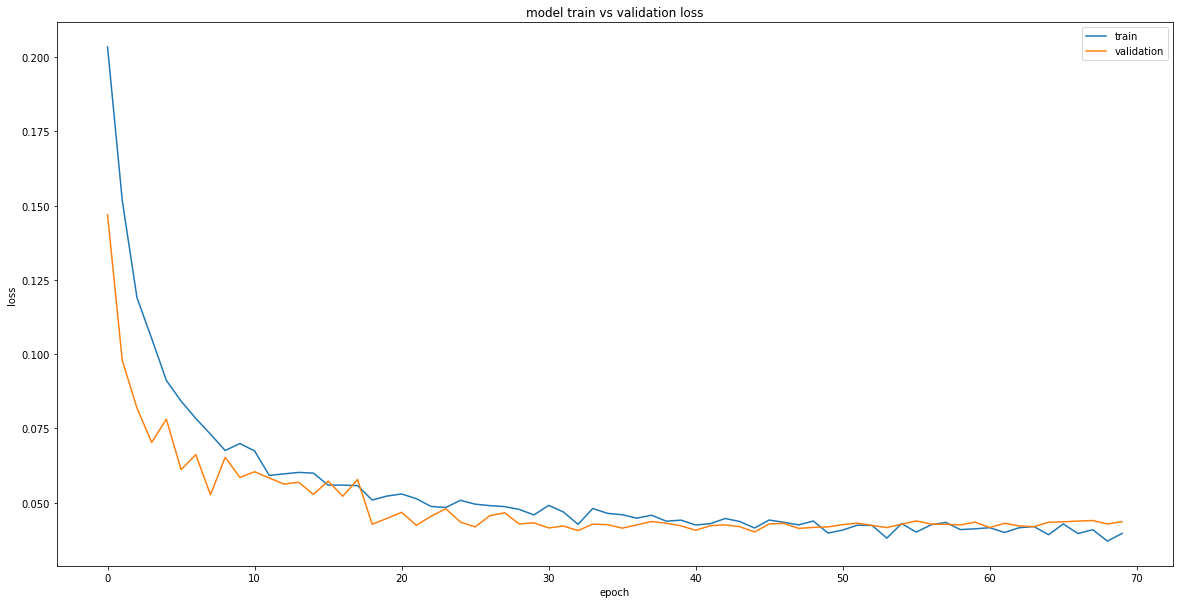

In [ ]:
from matplotlib import pyplot

# plot train and validation loss
plt.figure(figsize=(20,10))
pyplot.plot(model_loss['loss'])
pyplot.plot(model_loss['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       441
         1.0       0.93      0.93      0.93       199

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

